<a href="https://colab.research.google.com/github/Laxita-k-jain/Meta-Learning/blob/main/hand_written_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

11501568/11490434 [==============================] - 0s 0us/step


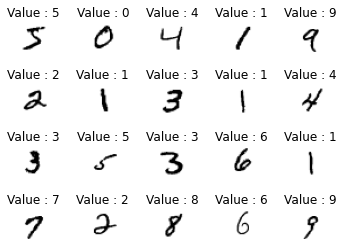

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Value : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=1)
  plt.axis('off')


In [ ]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)
print('How image looks like : ')
#print(train_img[0])

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)
How image looks like : 


In [ ]:
#plt.hist(train_img[0].reshape(784),facecolor='green')
#plt.title('Pixel vs intensity',fontsize=16)
#plt.ylabel('Pixels')
#plt.xlabel('Intensity')

In [ ]:
#normalisation
train_img=train_img/255.0
test_img=test_img/255.0

from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

#compiling the sequential model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.fit(train_img,train_lab,epochs=100)
model.save('project.h5')


Epoch 1/100
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1835 - accuracy: 0.9442
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0815 - accuracy: 0.9748
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0551 - accuracy: 0.9830
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0417 - accuracy: 0.9866
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 6/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0308 - accuracy: 0.9902
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 8/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0222 - accuracy: 0.9931
Epoch 9/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0189 - accuracy: 0.9941
Epoch 10/100
1875/1875 [==============================] - 10s 5m

In [ ]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2);
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 1s - loss: 0.4006 - accuracy: 0.9832
Test Loss 0.40055200457572937
Test Accuracy 0.9832000136375427


In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float')
	img = img / 255.0 
	return img

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 4.jpeg to 4.jpeg


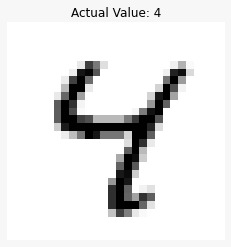

In [ ]:
from IPython.display import Image
Image('4.jpeg')

In [ ]:
img1 = load_image('4.jpeg')
print(1-img1)
print(test_img[0])
plt.imshow(1-img1[0],cmap='gray_r')
prediction=model.predict(1-img1)
print('Predicted value : ',np.argmax(prediction[0]))
print(prediction)


[[[0.03137255 0.03137255 0.03137255 0.03137255 0.03137255 0.03137255
   0.03137255 0.03137255 0.03137255 0.03137255 0.03137255 0.03137255
   0.03137255 0.02352941 0.03137255 0.03137255 0.03137255 0.03137255
   0.03137255 0.03137255 0.03137255 0.03137255 0.03137255 0.03137255
   0.03137255 0.03137255 0.03137255 0.03137255]
  [0.03137255 0.03137255 0.03137255 0.03137255 0.03137255 0.03137255
   0.03137255 0.03137255 0.04705882 0.03137255 0.38431373 0.02352941
   1.         0.03137255 0.04313725 0.01960784 0.76470588 0.99215686
   0.02352941 0.03529412 0.03137255 0.03137255 0.03137255 0.03137255
   0.03137255 0.03137255 0.03137255 0.03137255]
  [0.03137255 0.         0.         0.         0.         0.
   0.         0.         0.01568627 0.         0.00784314 0.01568627
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.03921569]
  [0.03137255 0.         0.         0.         0.   

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


NameError: ignored

Predicted Value:  7
[5.1819898e-19 1.6979346e-20 6.4724127e-13 3.9889909e-13 1.0746337e-22
 8.9073264e-23 1.2389257e-38 1.0000000e+00 4.8150444e-18 1.3162260e-08]


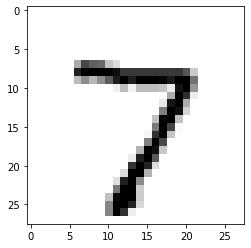

In [ ]:
# plt.imshow('a9 (1).png',cmap='gray_r')
# plt.title('Actual Value: {}'.format(test_lab[7]))
prediction=model.predict(test_img)
# plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
print(prediction[0])
from matplotlib import pyplot as plt
plt.imshow(test_img[0],cmap='gray_r')
